## Practical 1 - Single Level Regression in R ##

This practical provides an oppurtunity to practice using the Notable system (in which all of the computer lab sessions on the course will be delivered), and a chance to refresh your understanding of linear regression ahead of looking at multilevel models in future weeks.

By the end of this session you will

1) Understand how Notable can be used to run analysis in R without having to install specific software on your computer

2) Be able to produce descriptive statistics and graphs in R

3) Know how to undertake basic variable transformations in R

4) Be able to run linear regression models in R

5) Be able to produce basic model diagnostics

While the focus of these notes is on how to run the appropriate analysis in R, the course has a strong focus on the importance of substantive interpretation and you should take the oppurtunity to practice your interpretation of teh results achived.

### Importing Data and Descriptive Statistics ###

Throughout the course we will use a range of different datasets to demonstrate different types of model.  In this session, we will look at a small subset of variables from the European Social Survey that are concerned with an indivdual's self-reported level of Hedonism (The word ‘hedonism’ comes from the ancient Greek for ‘pleasure’. Psychological or motivational hedonism claims that only pleasure or pain motivates us.  In this case, Hedonism is measured through a range of questions that ask about different types of pleasure - which have been combined together to produce a single, continuous, measure).

The data are stored in a Stata datafile, "hedon.dta"

The "foreign" package provides R with the ability to read data from a range of differet statitical software.  R packages provide a means to extend the capabilities of R through providing easy to access commands, that if programmed directly would require extended amounts of coded.

The first step to use a command stored within an R package, is to load the required package via the "library()" command.  For example, the "foreign" package is loaded with the following command,

library (foreign)

However libraries can only be accessed if they are installed in your environment.  Nearly all the packages you need to complete the practical exercises on this course have been pre-installed on Noteable.  However, a recent upgrade means that the foreign package is not currently installed currently on Noteable, and we need to install a previous version.  You should therefore run the code below to install and load the package (please note this may take a minute or two to complete).

In [1]:
install.packages("foreign")
library(foreign)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



Once the "foreign" package is loaded, the "read.dta" command can be used to import the Hedonism dataset.

The command below opens the file "hedon.dta" and stores the contents in an R dataframe called "hedon".

In [2]:
hedon <- read.dta("hedon.dta")

The command,

ls()

can be used to see a list of all the objects in our current workspace.

In [3]:
ls() 

[1] "hedon"

In this case it shows we have one object ("hedon"); the dataframe we just created.

Before beginning any analysis, it is important to get a good understanding of the different variables in a dataset, the form they take, and how they are distributed.

R provides a range of commands to help with this process.

The "dim()" command provides a note of the number of rows (cases) and columns (variables) within a dataframe.

The "str()" command provides a summary of the type of data stored in each variable, eg. string (text), integer (whole number) etc.

The "head()" command allows us to view the first few cases in the dataset.

The "summary()" command provides basic descriptive statistics for each variable in a dataframe.

In each case, when using one of the above commands, the name of the dataframe should be inserted between "()".  For example, the command below shows that the dataframe "hedon" consists of 5845 cases (rows) and 8 variables (columns).

In [4]:
dim (hedon)

[1] 4916    7

Use the command box below to find out the form each varaible in the dataset takes and to produce descriptive statsitics for each variable in the dataset. You can put more than one command in the box, just start each command on a new line.

In [5]:
str(hedon)
summary(hedon)

'data.frame':	4916 obs. of  7 variables:
 $ country: Factor w/ 3 levels "Germany","France",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ hed    : num  1.548 0.762 -0.262 -1 -1.357 ...
 $ age    : num  25 30 59 47 31 24 59 45 61 37 ...
 $ eduyrs : num  10 11 9 10 9 13 12 11 12 10 ...
 $ female : num  0 0 0 1 0 0 1 0 0 0 ...
 $ income : num  4 6 6 7 5 4 7 6 7 5 ...
 $ ind    : num  7241 7242 7243 7244 7245 ...
 - attr(*, "datalabel")= chr ""
 - attr(*, "time.stamp")= chr "14 Jan 2020 09:09"
 - attr(*, "formats")= chr [1:7] "%9.0g" "%9.0g" "%9.0g" "%9.0g" ...
 - attr(*, "types")= int [1:7] 255 255 255 255 255 255 255
 - attr(*, "val.labels")= chr [1:7] "country" "" "" "" ...
 - attr(*, "var.labels")= chr [1:7] "" "" "" "" ...
 - attr(*, "expansion.fields")=List of 2
  ..$ : chr [1:3] "_dta" "_lang_c" "default"
  ..$ : chr [1:3] "_dta" "_lang_list" "default"
 - attr(*, "version")= int 12
 - attr(*, "label.table")=List of 1
  ..$ country: Named int [1:3] 5 9 10
  .. ..- attr(*, "names")= chr [1:3] "German

    country          hed              age            eduyrs     
 Germany:2224   Min.   :-3.762   Min.   :14.00   Min.   : 1.00  
 France :1136   1st Qu.:-0.810   1st Qu.:33.00   1st Qu.:10.00  
 UK     :1556   Median :-0.119   Median :46.00   Median :12.00  
                Mean   :-0.158   Mean   :47.08   Mean   :12.78  
                3rd Qu.: 0.524   3rd Qu.:61.00   3rd Qu.:15.00  
                Max.   : 2.905   Max.   :93.00   Max.   :33.00  
                                                 NA's   :17     
     female          income            ind       
 Min.   :0.000   Min.   : 1.000   Min.   : 7241  
 1st Qu.:0.000   1st Qu.: 5.000   1st Qu.: 8832  
 Median :1.000   Median : 6.000   Median :15138  
 Mean   :0.525   Mean   : 6.432   Mean   :12898  
 3rd Qu.:1.000   3rd Qu.: 8.000   3rd Qu.:16555  
 Max.   :1.000   Max.   :12.000   Max.   :17934  
                                                 

The "hist()" can be used to produce a histogram of a continuous variable.

The format "dataframe$variable" is used to refer to a specific variable within a dataframe.  For example, the command below provides a histogram of the variable "hed" stored in the dataframe "hedon".

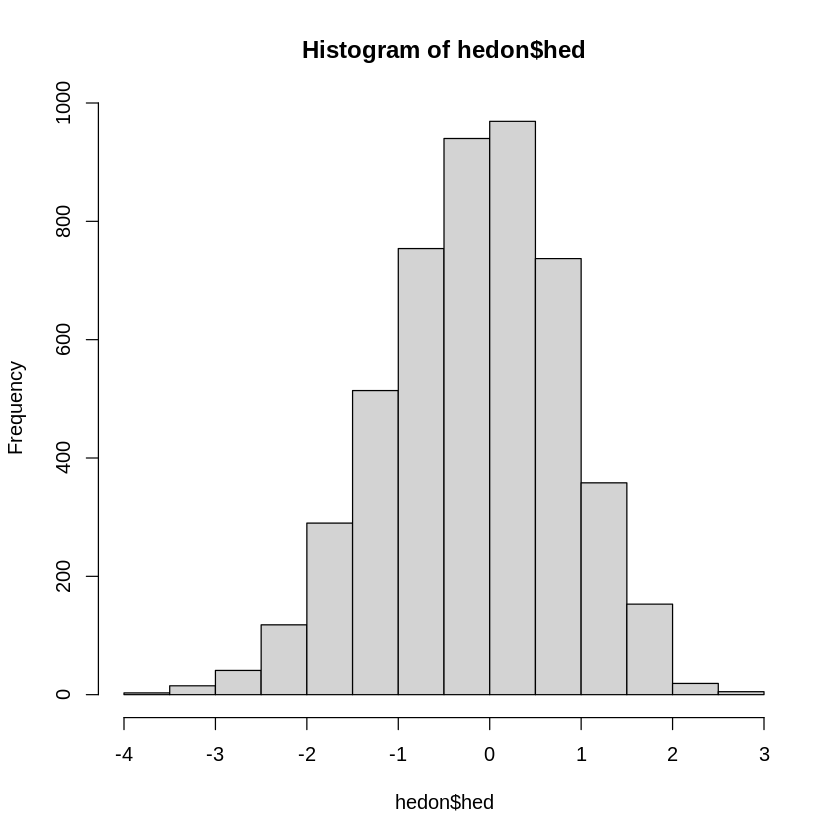

In [6]:
hist(hedon$hed)

Like many R commands, the "hist" command can take a series of arguments which help to customise its output.  For example, the command below ensures that the x-axis runs from -4 to 4, and the y-axis runs from 0 to 1200.

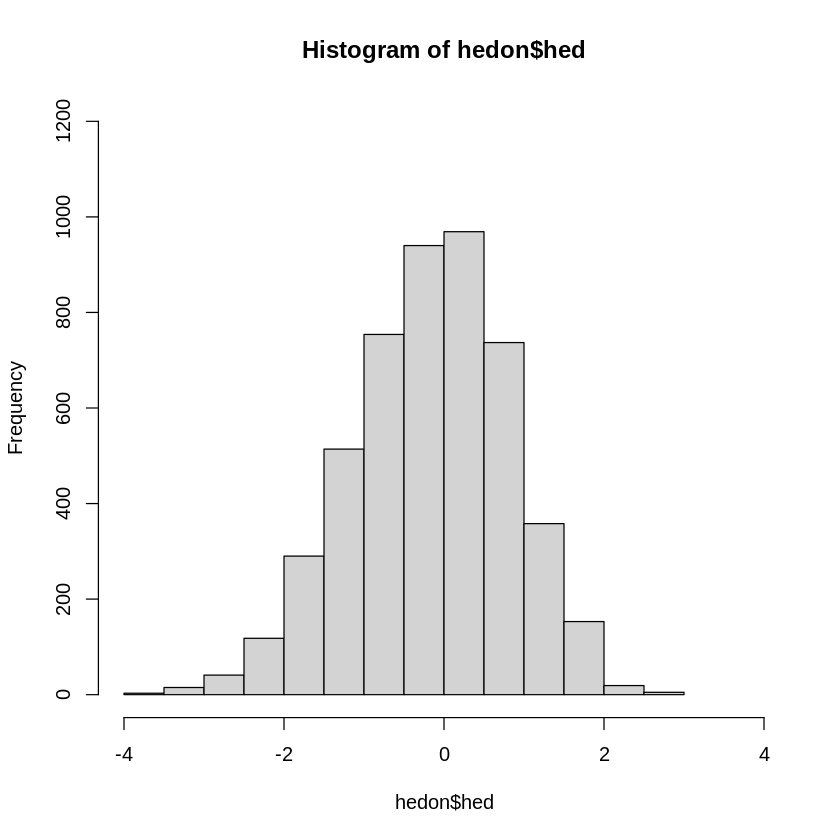

In [7]:
hist(hedon$hed, xlim = c(-4,4), ylim = c(0,1200))

The plot can be further customised by adding a title (refered to as main) and more meaningful lables on the x and y axis.  Note how the command below is split across multiple lines, this makes the syntax easier to read and has no impact on how the command is interpreted by R.

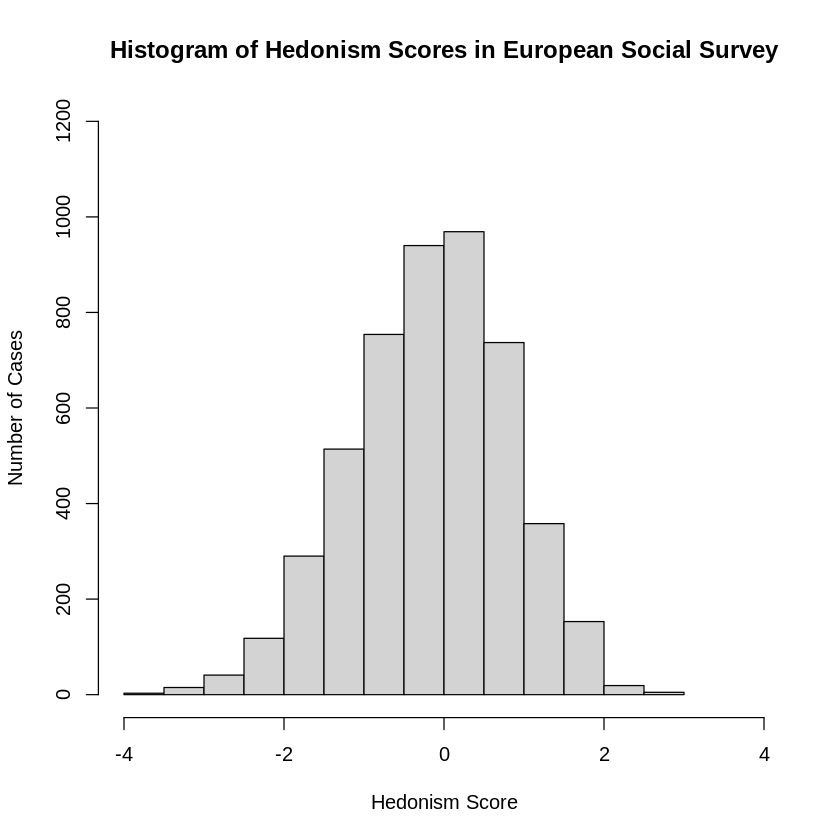

In [9]:
hist(hedon$hed, xlim = c(-4,4), ylim = c(0,1200),
    main = "Histogram of Hedonism Scores in European Social Survey",
    xlab = "Hedonism Score",
    ylab = "Number of Cases")

How would you describe the distribution of the hedomism scores shown in the histogram above?

Does this variable appear suitable for using as a dependent variable in an OLS regression model?

Using the command box below, draw a histograme of the variable age.  Make sure you give your plot a suitable title and labels, you may also adjust the limits of the axis if you wish to.

As above, you should reflect on whether the "age" variable is suitable for use (as an explanatory variable) in an OLS regression model

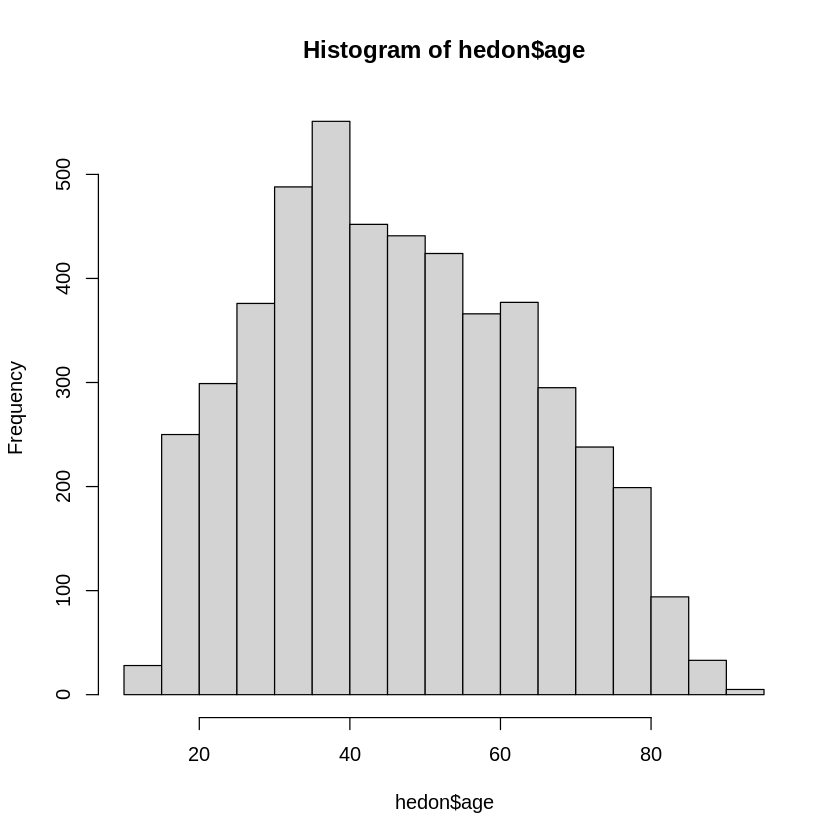

In [10]:
hist(hedon$age)

### Producing a Scatterplot of the Relationship Between Age and Hedonism###

An initial understanding of the relationship between a respondent's age and their self-reported hedonism can be achieved through producing a scatterplot of the two variables.

A basic scatterplot is produced using the "plot()" command, with the syntax "plot (xvar, yvar). For example,

In [ ]:
plot (hedon$age, hedon$hed)

The scatterplot can be customised with the same options as the histogram drawn previously.

Use the command box below to draw a scatterplot of the relationship between age and hedonism, with,

1) A suitable main title

2) Meaningful labels on the x and y axis

3) An X-axis that runs from 15 to 100

4) A Y-axis that runs from -4 to 4

A line of best fit, which summarises the OLS relationship between the two variables, can be added to the plot through use of the "lm()" command. The "lm()" command is used to conduct OLS regression within R (and is discussed in more detail below).  For now, just note that the "abline" command allows lines to be added to a plot, and that in this case the positioning of that line is based on the regression line calculated by the "lm()" command.  In this case the line is drawn in red, but this can be easily changed through the "col" option.

In [ ]:
plot (hedon$age, hedon$hed,
     main = "Relationship between Age and Self-Reported Hedonism",
     xlab = "Respondent's Age",
     ylab = "Self-reported Hedonism",
     xlim = c(15,100),
     ylim = c(-4,4))
     abline (lm(hed~age, data = hedon), col= 'red')

### A Simple Linear Regression of Hedonism as a Function of Age ###

As shown above, the basic syntax for an OLS regression of Hedomism as a function of Age using the "lm()" command is,

lm(hed~age, data = hedon)

The format of the command is as follows,

1) "lm" is the name of the command
2) the section within the brackets gives the formula for the regression equation and details of the dataset to be used
3) the formula begins with the name of the dependent variable (in this case "hed")
4) the tidla sign (~) seperates the right and left hand sides of teh equation
5) hence the variable after the tidla sign (age) is an explanatory variable
6) the "data" argument gives the name of teh dataframe to be used

In future sessions, multilevel models will be run using the "lme4" packages.  The syntax for the multilevel commands in lme4 follows the same basic layout as teh "lm()" command described here.

Entering the command 

lm(hed~age, data = hedon)

into R will produce statistical output showing the results of an OLS regression with "hed" as the dependent variable and "age" as the explanatory variable.

However, within R it is more common to store the results of a model in an object (rather than simply displaying the output on the screen).  Storing a model in an object means that it can be further integated once it is run, for instance through looking at diagnostic statistics or plotting the results.

The command below runs the OLS regression involving age and hedonism and stores the results in an object called "ols1".

In [ ]:
 ols1 <- lm(hed~age, data = hedon)

The results of the model can then be viewed using the "summary()" command, as shown below.

In [ ]:
summary (ols1)

Considering the output shown above, answer the following questions:-

1) What is the r-squared value for the model? What does this mean in substantive terms?

2) What's the relationship between age and self-reported hedonism?  Is this statistically significant?

3) What does the value of the intercept tell you?  Why might this information be of limited use/reliability?

We can make predictions about hedonism for year of age within the data using the fitted regression line.  The fitted regression line can be drawn by calculating predicted values and plottingthem against age. 

The "predict" command is used to calculate the predicted values and to store them in a new object called "predscore". 

In [ ]:
predscore <- predict(ols1)


The plot command can be used to plot the predicted values "predscore" against "age". We specify “1” for the type argument to specify that the type of graph should be a line plot.

In [ ]:
plot(hedon$age, predscore, type = "l")

The new object "predscore" contains the predicted score for every observation in the data. Clearly this variable contains far more information than we need to plot out a straight line, where only two end-points are required. Plotting the predicted score for every observation is computationally inefficient as it slows down the time required to plot the graph. While this is not a particular problem here, it can be a considerable problem for more complex graphs.

A more computationally efficient way to plot this graph is to simply run the command for the subset of data which gives each distinct combinations of the two variables used to plot the graph. To do this, we first need to create a new matrix object which contains the two variables of interest. Here we combine the "age" variable with the "predscore" vector in a new object called "uniquedata". 

In [ ]:
uniquedata <- cbind(age = hedon$age, predscore = predscore)
dim (uniquedata) ## This command is not needed - it is included to show the size of the vector (still one row per case)

This matrix can then be reduced to keep only unique records (one for each age) using the command,

In [ ]:
uniquedata <- unique(uniquedata)
dim (uniquedata) ## This command is not needed - it is included to show the size of the vector (now only 80 cases, one per age)

The plot command can now be repeated,  but this time using the unique records of the two variables which are found in the "uniquedata" object. Note how the [,1] and [,2] syntax is used to refer to column one (age) and column two (predscore)
of the "uniquedata" matrix.

In [ ]:
plot(uniquedata[, 1], uniquedata[, 2], 
     xlab = "Age", 
     ylab = "Predicted Hedonism", type = "l")

Note that even in this, relatively simple, example the plot based on the reduced dataset is produced notably quicker than the one created previously.

The values on the y-axis seem much more constrained than those in the original scatterplot darwn above (going from -1 to 0.4 rather than -4 to 4).  Why is this?  Is there an error in the model?

### Centering Explanatory Variables###

When an x value of 0 is outside the range of x and therefore the interpretation of the intercept is not meaningful, people often centre the x variable.  For example, in the above regression model the intercept refers to the Hedonism of a new born baby, even through the survey data only included adult respondents.

In a single level regression model, centering a variable does not change the estimate of the slope or the position of the regression line through the data.

In contrast, centering variables in multilevel model can impact on the estimation of the model, and how the results can be interpreted.  This is something we will return to in future sessions.  However, you might want to look at [Paccagnella, O, 2006, "Centering or Not Centering in Multilevel Models? The Role of the Group Mean and the Assessment of Group Effects"](https://journals.sagepub.com/doi/pdf/10.1177/0193841X05275649) 

Centering a variable simply involves subtracting the mean from the original values.  The results of that transformation can then be stored in a new column of the dataframe.

The R command "scale" can be used to standardise numeric variables, when the argument "scale" is set to "FALSE" this transformation is restricted to subtracting the variable mean.  If t argument "scale" is set to "TRUE" then the resultant figures are divided by the standard deviation of the original variable (i.e. z-scores are created).

For example, the command below creates a new variable called "agecan" within the "hedon" dataframe.  the values of the new variable represent the age of the respondent now centered around the mean age of all respondents.


In [ ]:
hedon$agecen <- scale(hedon$age, scale = FALSE)


 Using the command box below, run an OLS regression model with hedonism as the dependent variable and the newly centered age variable (created above) as the only indepndent variable.  Store this model in an object "ols2".  Look at the results, and confirm that the substantive findings of teh model are identical to model OLS1 produced above (although the intercept is different in both value and meaning).

### Checking Model Assumptions ###

Consider the original model with hedonism as a function of age (ols1) creadted above.  To check the model assumptions, plots of the standardised residuals against the normal scores and against the predictions of the mdel can be considered.

Recall that the command "predscore <- predict(ols1)" has alreday been used above to store the predicted score for each case in the dataset in an object called "predscare".

Stanadardised Residuals for a model are calculated using the "rstandard" command.  For example, the command below calculates the standardised residuals for the model OLS1 and stores them in an object called "estd"

In [ ]:
estd <- rstandard(ols1)

The normality assumption can be assessed through a Q-Q Plot.  A Q-Q Plot shows theresiduals versus the expected order statistics of the standard normal distribution. In essence, a 45 degree line indicates that the residuals are normally distributed.  

Assuming the standardised residuals are stored in the object "estd", a Q-Q Plot can be produced using the following syntax.

In [ ]:
qqnorm(estd, xlab = "Normal Score", ylab = "Standardized Residuals")
qqline(estd) ## This line simply adds a 45 degree line for reference - it is not needed for the basic plot

A visual check for the presence of homoskedasticity can be undertaken by plotting the standarised residuals against the predicted values for the model, as shown in the command box below.

In [ ]:
plot(predscore, estd, xlab = "Fitted Values", ylab = "Standardized Residuals")

The vertical spread of the points is approximately the same for each predicted value (and there appears no clear relationship between the two sets of values), so it can be concluded that the assumption of homoskedasticity (equal variance) appears reasonable.

### Regression with a Single Categorical Predictor###

Consider the regression model,

$y_{i} = b_{0}+b_{1}x_{i}+e_{i}$

where $y_{i}$ is the hedonism score of indivdual i, and $x_{i}=1$ if indivdual i is female, and 0 if indivdual i is male.  the effect of been female, rather than male, on average hedonism is therefore represented by the equation,

$hed_{i} = b_{0}+b_{1}female_{i}+e_{i}$

In the dataframe "hedon", the variable female records whether a respondent was male (0) or female (1).

Using the command box below, estimate an OLS regression model with hedonism as the dependnet variable, and the respondent's sex as the only independent variable (remember to store your model in an appropriatly named object).  

What do you conclude about the average hedonism for female respondents compared to males?

### Regression with a Multiple Categorical Predictors - Country Differences in Hedonism###

Recall the variable "country" which is part of the "hedon" dataframe created at the start of this exercise.  This variable records the country that a respondent was resident in when they answered the survey.  It take one of three values, 

"Germany"
"France" 
"UK"

In R, categorical variables that contain more than two categories are called factors.  Running the "str(hedon)" command (discussed towards the start of this exercise) confirms that the variable "country" is considered a factor. N.B when using other datasets, if you believe a variable should be considered a factor, but R has not recognised it as such, you can consult the R documentation on the command "as.factor" for information as to how to recode such variables.

Once R understands that a particular variable is multinomial in nature, entering it as an explantory variable in a regression model will cause R to automatically create the neccssary dummy variables.  By default, the first category within the factor is used as the rference category.

For example, the commands below run an OLS regression with hedonism as the dependent variable and the respodnets country as the only explanation considered.  Germany is used as the reference category.




In [ ]:
ols4 <- lm(hed~country, data = hedon)
summary(ols4)


What does the model suggest about average hedonism in France and the UK? (recall that the dummay variable "countryFrance" is an estimate of the diference between France and Germany, while "countryUK" provides a comparrison between the UK and Germany).

### Multiple Regression - Modelling Sex and Age Simultaneously###

The syntax used for regression models in R (both single level and multilevel) can be easily expanded to consider multiple explanatory factors simultaneously.  Additionally, explantory factors are simply added to the equation seperated by a "+".

For example, the following command would produce a regression of hedonism controlling for both the espondent's age and country of residence.

lm(hed~age+country, data = hedon)

Using the command box below create an OLS regression of hendonism as a function of a respondent's age and sex.  Remember to store your model in an appropriately named object.

What is the substantive interpretation of your model?

### Interaction Effects - Does the Effect of Age vary by Sex?

Consider the model,

$y_{i} = b_{0}+b_{1}x_{1i}+b_{2}x_{2i}+b_{3}x_{1i}x_{2i}+e_{i}$

where $x_{1}$ is a continuous explanatory variable, $x_{2}$ a categorical variable (with two catgories for simplicity) and $x_{1}x_{2}$ the interaction of those two explanatory variables.  For example,

$hed_{i} = b_{0}+b_{1}age_{i}+b_{2}female_{i}+b_{3}(age:female)_{i}+e_{i}$

In R, interaction terms are denoted in the regression equation using ":" for example, the code below creates a model concerning, age, female and the inteaction of those two variables based on the "hedon" dataframe.

In [ ]:
ols6 <- lm(hed~age+female+female:age, data = hedon)
summary (ols6)

What does the interaction term in the above model say about whether the relationship between age and hendonism varies between men and women?

The interaction effect can be viewed graphically by:-

    1) Calculating the predicted hedonism values for each case in the dataset
    2) Plotting thse seperately (but on the same graph) for males and females

As above, the predicted scores from the model can be stored in a vector through the "predict" command

In [ ]:
predscore6 <- predict(ols6)

As before, that vector can then be combined with the variables about age and sex from the original dataframe, and the unique combinations of explanatory factors identified to reduce the number of datapoints.

In [ ]:
preddata <- cbind(hedon$age, hedon$female, predscore6)
preddate <- unique(preddata)

Since the analysis involves multiple variables, it is cleaner to convert the matrix to a dataframe, and refer to variables by name rather than column number.

In [ ]:
colnames(preddata) <- c("age", "female", "predscore")
preddata <- data.frame(preddata)

The use of,

type = "n"

option in a plot command creates a blank plot with appropriate labels and axis values, but no data.

The ouput from additional plot commands is then superimpossed on the blank graph.

For example the first "lines" command below draws a line graph of the relationship between "age" and "predscore" for cases where the variable "female" equals 0 (i.e. the respondent is male).  The second "lines" command does the same but for females rather than males.

Finally, the "legend command" adds a legend to the bottom left of the graph.  Full details of the options for the plot command can be found in the [R Documentation](https://www.rdocumentation.org/packages/graphics/versions/3.6.1/topics/plot) or the [R Graph Gallery](https://www.r-graph-gallery.com/)

In [ ]:
plot(preddata$age, preddata$predscore, type="n",
     xlab = "Age", 
     ylab = "Predicted Hedonism")

 lines(preddata$age[preddata$female == 0],
preddata$predscore[preddata$female == 0], col = "blue")


 lines(preddata$age[preddata$female == 1],
preddata$predscore[preddata$female == 1], col = "red")

legend("bottomleft", c("Male", "Female"),
       col=c("red", "blue"), lty=1:2, cex=0.8)
